Running with: /home/codespace/.python/current/bin/python
Price         Adj Close        Close         High          Low         Open  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                          
2000-01-03  1455.219971  1455.219971  1478.000000  1438.359985  1469.250000   
2000-01-04  1399.420044  1399.420044  1455.219971  1397.430054  1455.219971   
2000-01-05  1402.109985  1402.109985  1413.270020  1377.680054  1399.420044   
2000-01-06  1403.449951  1403.449951  1411.900024  1392.099976  1402.109985   
2000-01-07  1441.469971  1441.469971  1441.469971  1400.729980  1403.449951   

Price           Volume  
Ticker           ^GSPC  
Date                    
2000-01-03   931800000  
2000-01-04  1009000000  
2000-01-05  1085500000  
2000-01-06  1092300000  
2000-01-07  1225200000  
Columns: <bound method IndexOpsMixin.tolist of MultiIndex([('Adj Close', '^GSPC'),
            (    'Close', '

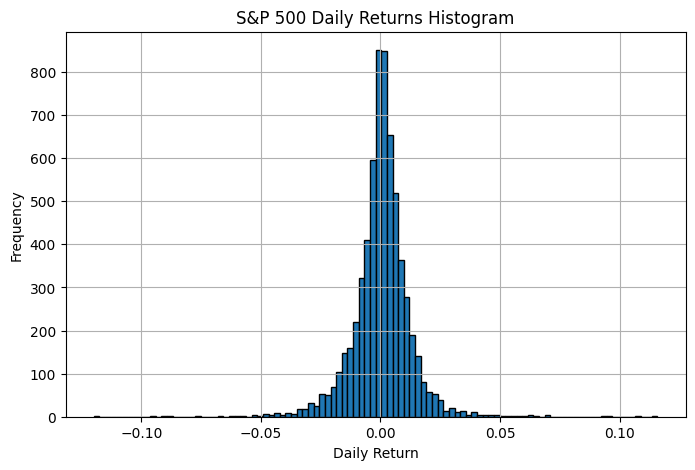

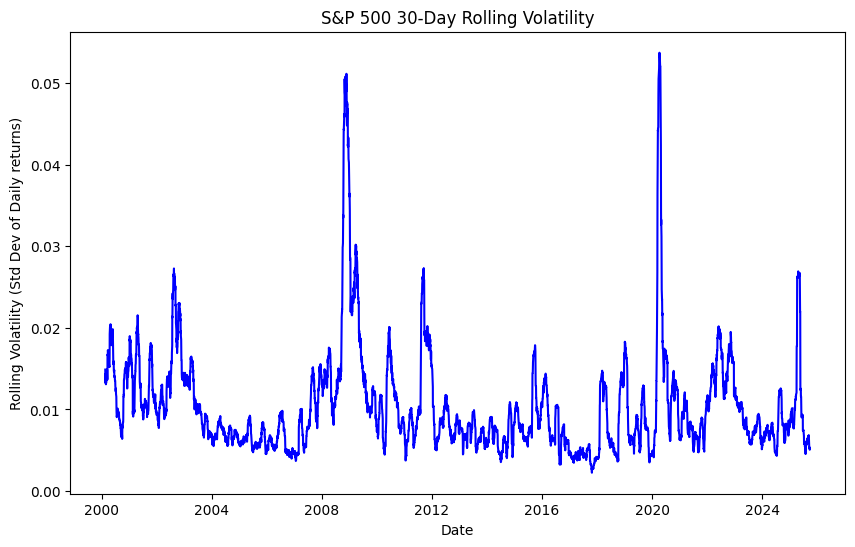

In [ ]:
import sys
import streamlit as st
print("Running with:", sys.executable)
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import streamlit as st
    USE_STREAMLIT = True
except ImportError:
    USE_STREAMLIT = False


ticker = '^GSPC'  # S&P 500 index symbol
data = yf.download(ticker, start='2000-01-01', progress=False, auto_adjust=False)

print(data.head())
print("Columns:", data.columns.tolist)

#Compute daily returns
data['Return'] = data['Adj Close'].pct_change()  #See masterdoc for ADJ CLOSE details 
                                            
#Rolling 30 day volatility
data['Rolling_vol'] = data['Return'].rolling(window=30).std() # Masterdoc, rolling window = 30 means 30 days

#Streamlit title for both streamlit and non-streamlit modes
if USE_STREAMLIT:
    st.title("S&P 500 Dashboard")
else:
    print("S&P 500 Dashboard")


# --- Histogram of Returns ---
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.hist(data["Return"].dropna(), bins=100, edgecolor="blue") #here Return is the daily return column we created above
ax1.set_title("S&P 500 Daily Returns Histogram")
ax1.set_xlabel("Daily Return")
ax1.set_ylabel("Frequency")

if USE_STREAMLIT:
    st.pyplot(fig1)
else:
    plt.show()


# --- Rolling Volatility ---
fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.plot(data.index, data["Rolling_vol"], color="blue") # Plotting the rolling volatility, data index is the date (x axis) and rolling vol is the y axis
ax2.set_title("S&P 500 30-Day Rolling Volatility")
ax2.set_xlabel("Date")
ax2.set_ylabel("Rolling Volatility (Std Dev of Daily Returns)")

if USE_STREAMLIT:
    st.pyplot(fig2)
else:
    plt.show()
plt.ylabel('Rolling Volatility (Std Dev of Daily returns)')
